In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
import xgboost
import lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, confusion_matrix, classification_report 
from sklearn.metrics import make_scorer, fbeta_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn .model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import pickle
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Personal/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Removing missing values 
data.dropna(inplace = True)
#Remove customer IDs from the data set
# Convert String values (Yes and No) of Churn column to 1 and 0
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1
#convert to integer .
data['Churn']=data['Churn'].astype('int32')



In [ ]:
# Converting Total Charges to a numerical data type.

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
Emp_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in Emp_cols:
    data[i]=data[i].replace("",np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Text(0.5, 1.0, '% of Churn')

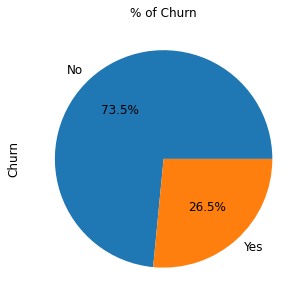

In [ ]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

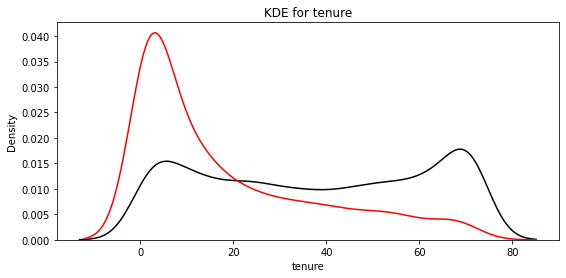

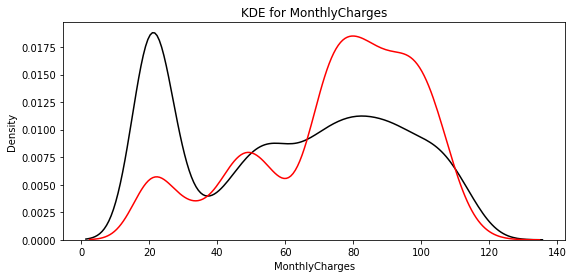

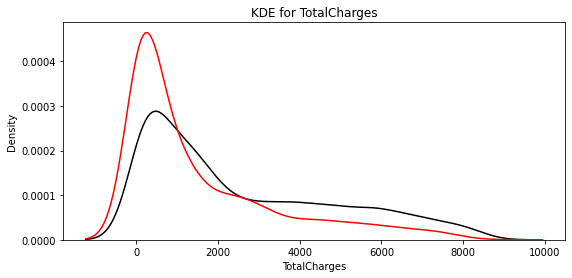

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][feature], color= 'black', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][feature], color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

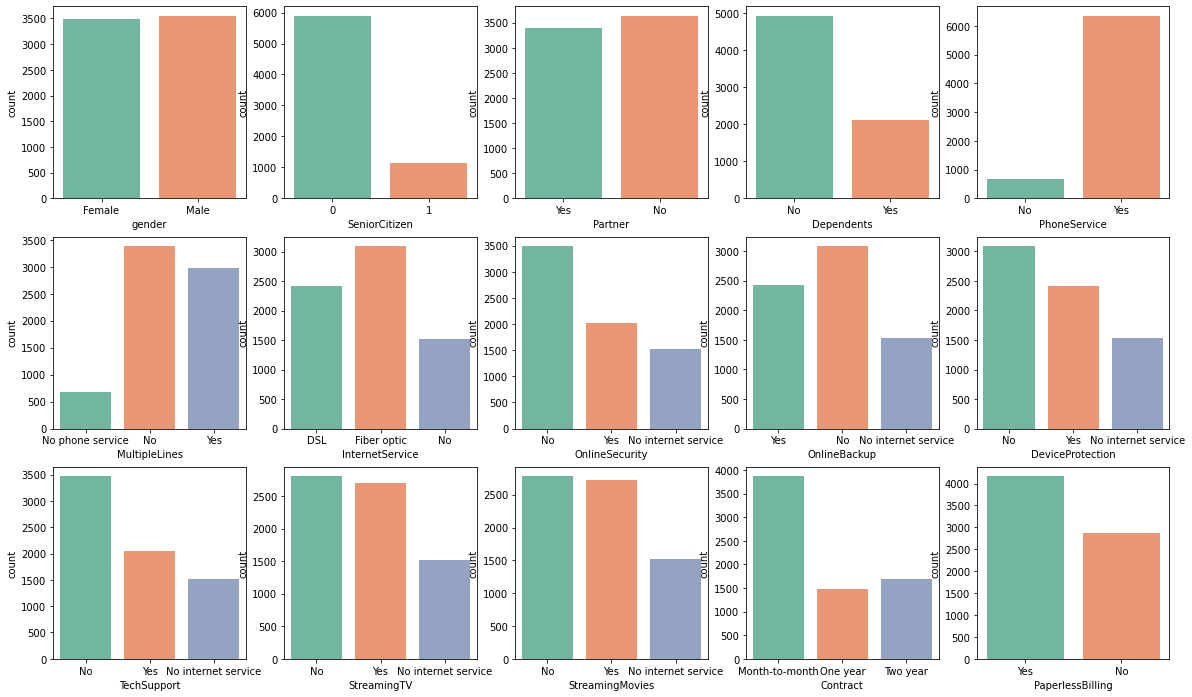

In [ ]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot, palette = "Set2")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

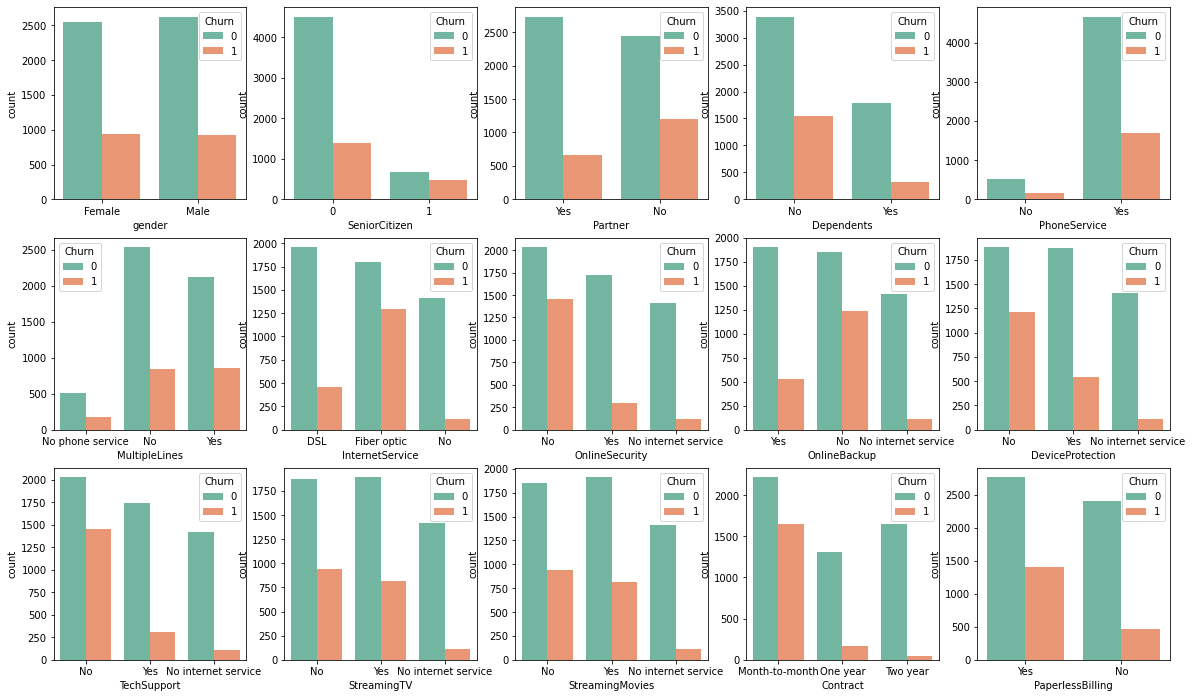

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable],hue=data["Churn"], ax=subplot, palette = "Set2")

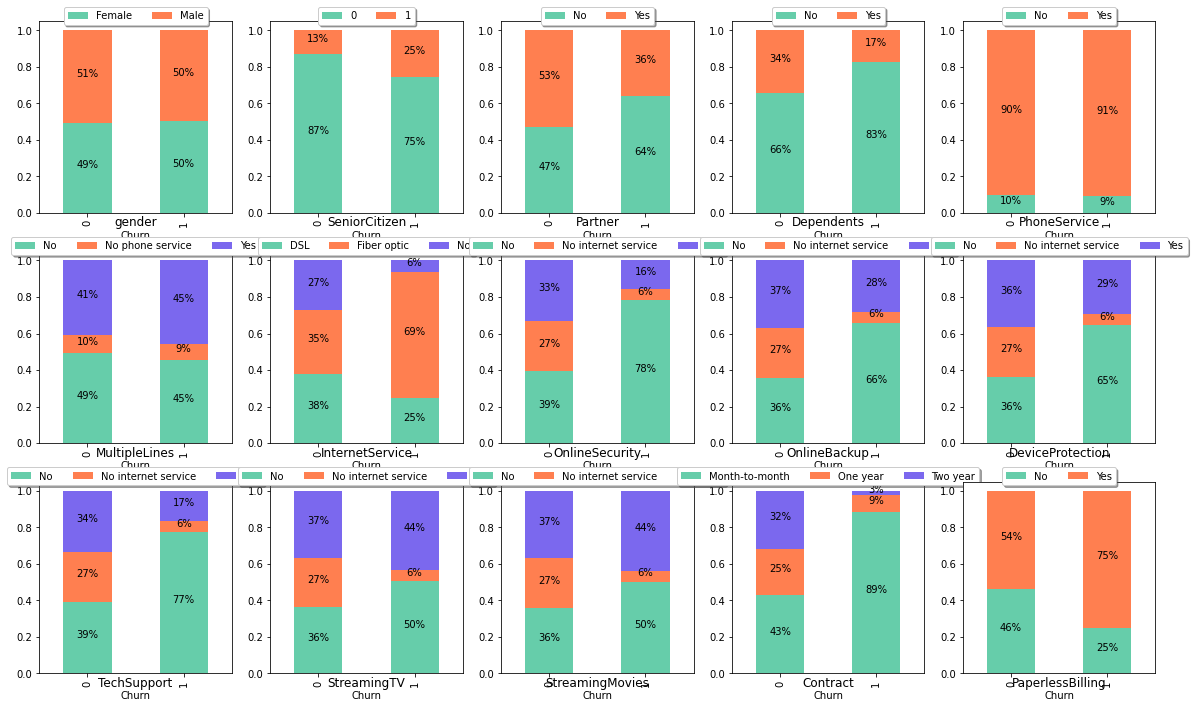

<Figure size 216x216 with 0 Axes>

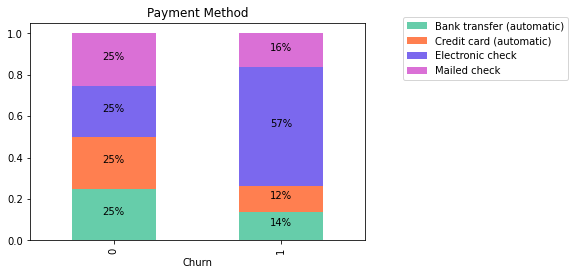

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    result = pd.crosstab(data['Churn'], data[variable])
    result_pct = result.div(result.sum(1), axis=0)
    ax = result_pct.plot(kind='bar', stacked=True, ax=subplot, color = ["mediumaquamarine", "coral", "mediumslateblue"])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=3, fancybox=True, shadow=True)
        ax.set_title(str(variable), y=-0.10)
plt.figure(figsize=(3,3))
result = pd.crosstab(data['Churn'], data["PaymentMethod"])
result_pct = result.div(result.sum(1), axis=0)
ax1 = result_pct.plot(kind='bar', stacked=True, color = ["mediumaquamarine", "coral", "mediumslateblue", "orchid"])

for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Payment Method")
plt.show()

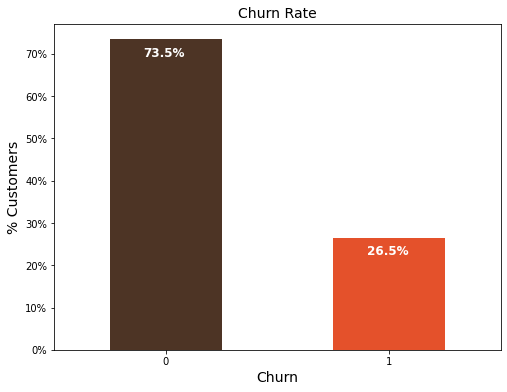

In [ ]:
#Predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )

**Feature Engineering**

In [ ]:
np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)

array([[nan, nan],
       [nan,  1.]])

In [ ]:
data.drop('TotalCharges', axis = 1, inplace = True)

In [ ]:
data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
data['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

In [ ]:
#to reduce data complexity make 5 groups
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

data["tenure_group"]=data["tenure"].apply(lambda x: tenure(x))
data.tenure_group.value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

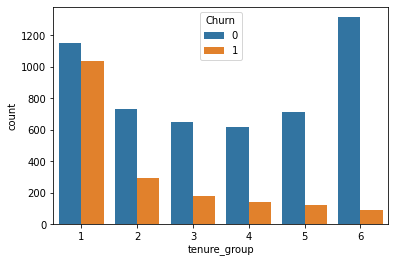

In [ ]:
data.drop('tenure', axis = 1, inplace = True)#drop as tenure_group is created
sns.countplot(x="tenure_group", hue="Churn", data=data)

In [ ]:
data.drop(['MultipleLines', 'PhoneService',], axis = 1, inplace = True)
data.drop(['gender'],axis=1,inplace= True) #gender is also notimportance
data.drop(['customerID'],axis=1,inplace= True)

In [ ]:
data.Partner = data.Partner.apply(lambda x: 0 if x == "No" else 1)
data.Dependents = data.Dependents.apply(lambda x: 0 if x == "No" else 1)
data.PaperlessBilling = data.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

data = pd.get_dummies(data, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
data.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


**Selecting features **

In [ ]:
#Create Feature variable X and Target variable y
X = data.drop(['Churn'], axis = 1)
y = data['Churn']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)
#Feature selection by Chi2 test
#return F-score and P-value
from sklearn.feature_selection import chi2
F_P_Score=chi2(X_train,y_train)
F_P_Score

(array([ 107.90627022,   65.27761417,  111.84171764,   82.98290568,
        2846.02127757,  805.0509011 ,  299.84397049,  220.65826752,
         220.65826752,  115.69418722,  220.65826752,   38.89515666,
         220.65826752,   18.10439828,  220.65826752,  115.85769874,
         220.65826752,   14.2019055 ,  220.65826752,    8.48515297,
         162.01428597,  387.13010175,   91.47518994,  363.22551823,
          33.50744888]),
 array([2.81794406e-025, 6.50561666e-016, 3.87006107e-026, 8.27660467e-020,
        0.00000000e+000, 4.30436007e-177, 3.56258287e-067, 6.49829785e-050,
        6.49829785e-050, 5.54542432e-027, 6.49829785e-050, 4.47188740e-010,
        6.49829785e-050, 2.09117833e-005, 6.49829785e-050, 5.10654439e-027,
        6.49829785e-050, 1.64204148e-004, 6.49829785e-050, 3.58056471e-003,
        4.10740734e-037, 3.48869843e-086, 1.13000111e-021, 5.58785615e-081,
        7.09915872e-009]))

In [ ]:
#plot importance features based on P-value
P_ranked_features=pd.Series(F_P_Score[1],index=X_train.columns)
P_ranked_features.sort_index(ascending= False)

tenure_group                             4.304360e-177
TechSupport_Yes                           5.106544e-27
TechSupport_No internet service           6.498298e-50
StreamingTV_Yes                           1.642041e-04
StreamingTV_No internet service           6.498298e-50
StreamingMovies_Yes                       3.580565e-03
StreamingMovies_No internet service       6.498298e-50
SeniorCitizen                             2.817944e-25
PaymentMethod_Mailed check                7.099159e-09
PaymentMethod_Electronic check            5.587856e-81
PaymentMethod_Credit card (automatic)     1.130001e-21
Partner                                   6.505617e-16
PaperlessBilling                          8.276605e-20
OnlineSecurity_Yes                        5.545424e-27
OnlineSecurity_No internet service        6.498298e-50
OnlineBackup_Yes                          4.471887e-10
OnlineBackup_No internet service          6.498298e-50
MonthlyCharges                            0.000000e+00
InternetSe

In [ ]:
#correlation
correlation = X_train.corr()
correlation

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.011648,-0.211515,0.158854,0.221910,0.024729,0.255260,-0.183521,-0.183521,-0.034445,...,-0.056404,-0.183521,0.107668,-0.183521,0.121474,-0.046131,-0.114947,-0.030043,0.176093,-0.156820
Partner,0.011648,1.000000,0.448693,-0.011840,0.098550,0.367813,-0.005928,-0.009893,-0.009893,0.152545,...,0.122420,-0.009893,0.125669,-0.009893,0.122033,0.085780,0.247462,0.071328,-0.077955,-0.087722
Dependents,-0.211515,0.448693,1.000000,-0.111633,-0.112570,0.148062,-0.168253,0.132185,0.132185,0.088059,...,0.068206,0.132185,-0.020275,0.132185,-0.039186,0.070955,0.200916,0.060617,-0.147716,0.059749
PaperlessBilling,0.158854,-0.011840,-0.111633,1.000000,0.351672,0.009835,0.324384,-0.323287,-0.323287,-0.007164,...,0.032348,-0.323287,0.220993,-0.323287,0.218971,-0.051735,-0.142272,-0.011199,0.215827,-0.206020
MonthlyCharges,0.221910,0.098550,-0.112570,0.351672,1.000000,0.245279,0.786032,-0.766070,-0.766070,0.298690,...,0.336367,-0.766070,0.627089,-0.766070,0.627105,-0.004955,-0.063176,0.028301,0.278138,-0.381668
tenure_group,0.024729,0.367813,0.148062,0.009835,0.245279,1.000000,0.014782,-0.048934,-0.048934,0.315836,...,0.327861,-0.048934,0.277347,-0.048934,0.285666,0.208695,0.543261,0.225946,-0.205835,-0.228107
InternetService_Fiber optic,0.255260,-0.005928,-0.168253,0.324384,0.786032,0.014782,1.000000,-0.467682,-0.467682,-0.026370,...,-0.027228,-0.467682,0.326369,-0.467682,0.319132,-0.084976,-0.206339,-0.052352,0.346017,-0.307144
InternetService_No,-0.183521,-0.009893,0.132185,-0.323287,-0.766070,-0.048934,-0.467682,1.000000,1.000000,-0.334194,...,-0.332891,1.000000,-0.418887,1.000000,-0.419827,0.048586,0.199705,-0.003136,-0.287318,0.327952
OnlineSecurity_No internet service,-0.183521,-0.009893,0.132185,-0.323287,-0.766070,-0.048934,-0.467682,1.000000,1.000000,-0.334194,...,-0.332891,1.000000,-0.418887,1.000000,-0.419827,0.048586,0.199705,-0.003136,-0.287318,0.327952
OnlineSecurity_Yes,-0.034445,0.152545,0.088059,-0.007164,0.298690,0.315836,-0.026370,-0.334194,-0.334194,1.000000,...,0.351913,-0.334194,0.172354,-0.334194,0.185363,0.102473,0.187279,0.113144,-0.097814,-0.082507


<AxesSubplot:>

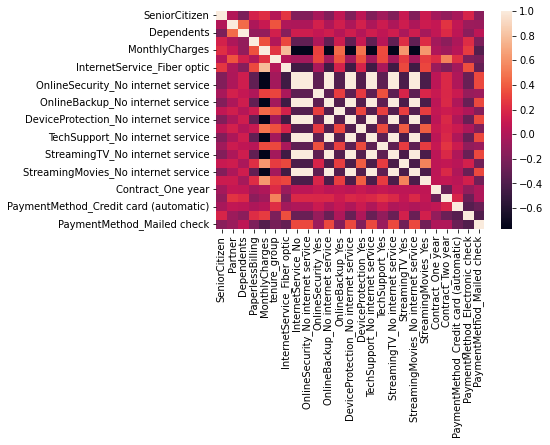

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
threshold=0.9
#find correlated Features
def correlation(X_train, threshold):
    col_corr=set()   #set all correlated col names
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  #we are interested in absoulute coeff value
                colname= corr_matrix.columns[i]   #get the name of col
                col_corr.add(colname)
    return col_corr            
                
            
correlation(data.iloc[:,:],threshold)

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [ ]:
data.drop(['DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'],axis=1,inplace= True)#Remove  highly corelated Features.
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

tenure_group                             0.075168
Contract_Two year                        0.057062
PaymentMethod_Electronic check           0.050653
MonthlyCharges                           0.049234
InternetService_Fiber optic              0.046875
InternetService_No                       0.033036
Dependents                               0.029506
StreamingMovies_No internet service      0.029502
StreamingTV_No internet service          0.029140
OnlineSecurity_No internet service       0.028328
Contract_One year                        0.027786
DeviceProtection_No internet service     0.025322
OnlineBackup_No internet service         0.023623
Partner                                  0.021230
TechSupport_No internet service          0.020638
TechSupport_Yes                          0.019853
PaperlessBilling                         0.018959
SeniorCitizen                            0.016708
OnlineSecurity_Yes                       0.009426
PaymentMethod_Mailed check               0.007147


In [ ]:
X_train_Nm,X_test_Nm,y_train_Nm,y_test_Nm=train_test_split(X,y,train_size=0.8,random_state=0)#for over sampling cheak
#scaling for train SVM & KNN Classifier
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#define a function that plot feature wt for a classifier
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    top_weights_selected.plot(kind='bar')
#define a function that plot confusion matrix for a classifier and accuracy score
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
                          
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score Train: {classifier.score(X_train, y_train)}(as comparision)')
    return print("")
#Define a function that plot ROC curve & AUC Score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')
    
#define a function for precision, recall- curve & f1 score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

**1.LOGISTIC REGRESSION imbalanced**

In [ ]:
logit=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)
logit=GridSearchCV(logit,grid,cv=cv,n_jobs=-1,scoring='recall')
logit.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
y_pred=logit.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[935 106]
 [178 190]]
0.7984386089425124
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

0.707239589859249


In [ ]:
y_pred_prob = logit.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Logistic test roc-auc: 0.8227900639017667


In [ ]:
y_pred_prob = logit.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Logistic test roc-auc: 0.8227900639017667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


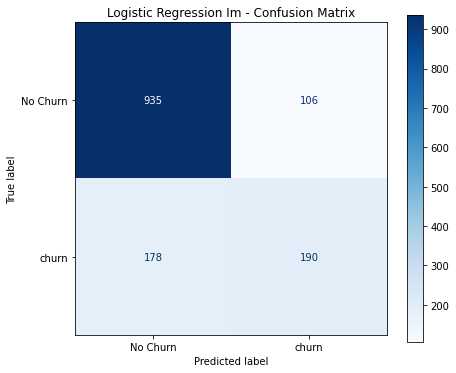

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


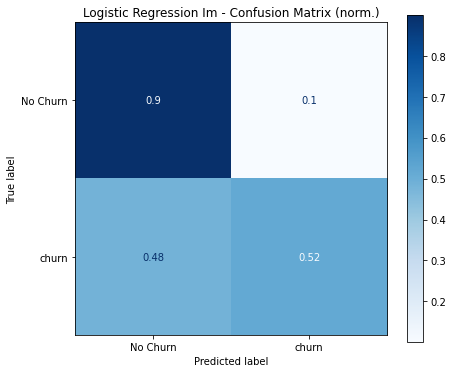

Accuracy Score Test: 0.7984386089425124
Accuracy score Train: 0.5423051299133911(as comparision)



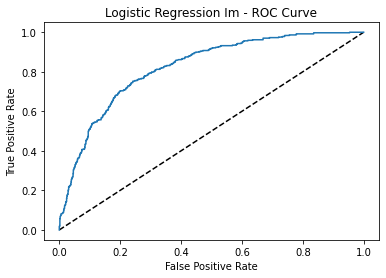

AUC Score (ROC): 0.8227900639017667



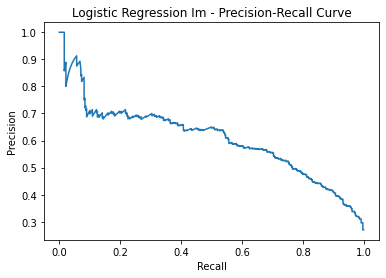

F1 score: 0.572289156626506 
AUC Score (PR): 0.6061748827682509



In [ ]:
#plot Model evaluation
confusion_matrix_plot(X_train, y_train, X_test, y_test, logit, y_pred,'Logistic Regression Im')
roc_curve_auc_score(X_test, y_test, y_pred_prob,'Logistic Regression Im')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_prob,'Logistic Regression Im')

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE
os=SMOTETomek(0.7)
X_train_Tk,y_train_Tk=os.fit_resample(X_train,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Tk)))

The num of classes before fit Counter({0: 4133, 1: 1501})
the num of classes after fit Counter({0: 3963, 1: 2723})


In [ ]:
#for SVM and KNN
os=SMOTETomek(0.8)
X_train_Nm_Ov,y_train_Ov=os.fit_resample(X_train_scaled,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Ov)))

The num of classes before fit Counter({0: 4133, 1: 1501})
the num of classes after fit Counter({0: 3836, 1: 3009})


**RANDOM FOREST**

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100, 200, 300]
}
# Create a based model
rf_C = RandomForestClassifier()
# Instantiate the grid search model
RF_model = GridSearchCV(estimator = rf_C, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
RF_model .fit(X_train_Tk,y_train_Tk)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 100, 200, 300]},
             verbose=2)

In [ ]:
RF_model.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
rf_model=RandomForestClassifier(class_weight={0:1, 1:3}, max_depth = 10,random_state=1,
                                  n_estimators=500, oob_score=True, min_samples_leaf=6, min_samples_split=8)
rf_model .fit(X_train_Tk,y_train_Tk)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=6, min_samples_split=8,
                       n_estimators=500, oob_score=True, random_state=1)

In [ ]:
y_pred=rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))


[[667 374]
 [ 63 305]]
0.6898509581263307
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1041
           1       0.45      0.83      0.58       368

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.71      1409

0.7347672075345613


In [ ]:
ytrain_pred = rf_model.predict_proba(X_train_Tk)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
y_pred_rf_prob = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_rf_prob[:,1])))

RF train roc-auc: 0.9243849808303006
RF test roc-auc: 0.816655703128263


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


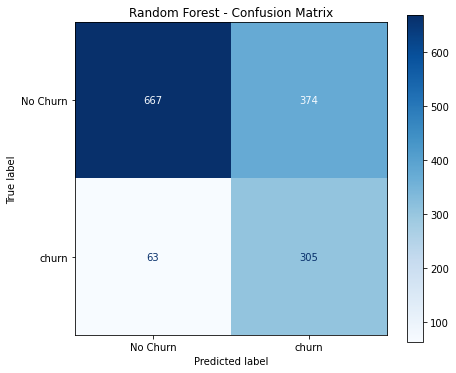

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


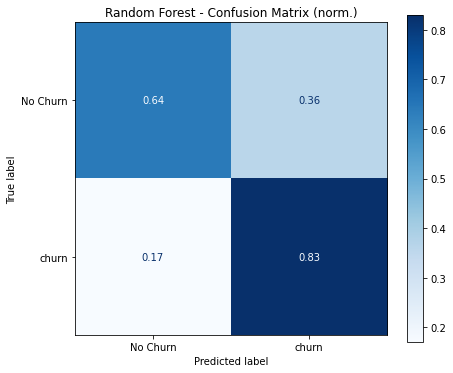

Accuracy Score Test: 0.6898509581263307
Accuracy score Train: 0.806311696081364(as comparision)



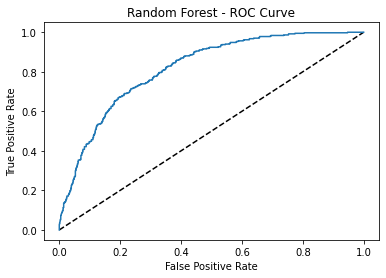

AUC Score (ROC): 0.816655703128263



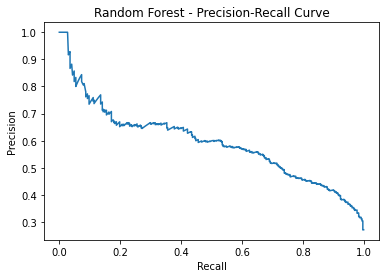

F1 score: 0.5826170009551099 
AUC Score (PR): 0.5936189643898419



In [ ]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, rf_model, y_pred,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob,'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_rf_prob,'Random Forest')

**LOGISTIC REGRESSION**

In [ ]:
log_s=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)


In [ ]:
log_S=GridSearchCV(log_s,grid,cv=cv,n_jobs=-1,scoring='recall')
log_S.fit(X_train_Tk,y_train_Tk)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
y_pred=log_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[821 220]
 [123 245]]
0.7565649396735273
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1041
           1       0.53      0.67      0.59       368

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409

0.7272128075011485


In [ ]:
#ytrain_pred = log_S.predict_proba(X_train_Tk)
#print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred)))
ytest_pred_prob = log_S.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_prob[:,1])))

Logistic test roc-auc: 0.8084408804243411


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


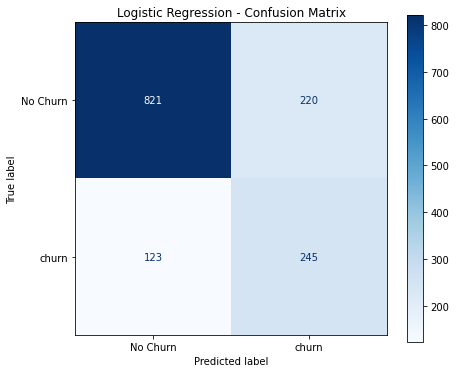

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


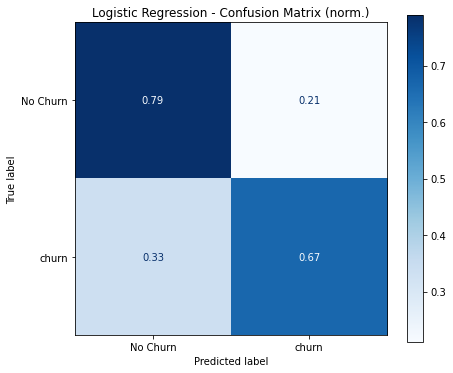

Accuracy Score Test: 0.7565649396735273
Accuracy score Train: 0.781491002570694(as comparision)



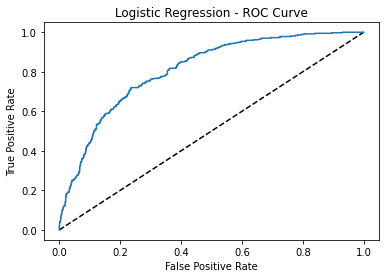

AUC Score (ROC): 0.8084408804243411



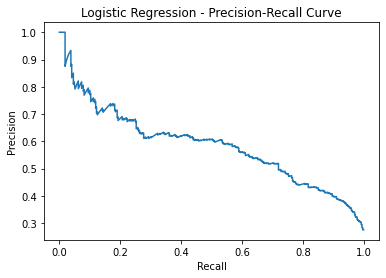

F1 score: 0.5882352941176471 
AUC Score (PR): 0.5851938279201847



In [ ]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, log_S, y_pred,'Logistic Regression')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'Logistic Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'Logistic Regression')